## Design an algorithm to accurately predict the access status to certain resources of employees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
...,...,...,...,...,...,...,...,...,...,...
32764,1,23497,16971,117961,118300,119993,118321,240983,290919,118322
32765,1,25139,311198,91261,118026,122392,121143,173805,249618,121145
32766,1,34924,28805,117961,118327,120299,124922,152038,118612,124924
32767,1,80574,55643,118256,118257,117945,280788,280788,292795,119082


In [3]:
# Here Action is the target variable: 1 if the resource was approved, 0 if the resource was not
# MGR_ID: The Employee ID of the manager of the current employee id
# RESOURCE: An ID for each resource
# ROLE_ROLLUP_1: Company role grouping category id 1
# ROLE_ROLLUP_2: Company role grouping category id 2
# ROLE_DEPTNAME: Company role department description
# ROLE_TITLE: Company role business title description
# ROLE_CODE: Company role code; this code is unique to each role

## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [5]:
df.isnull().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

#### As we can check that there is no rows that have NAN values so no need to apply preprocessing steps for this data

In [6]:
df.dtypes

ACTION              int64
RESOURCE            int64
MGR_ID              int64
ROLE_ROLLUP_1       int64
ROLE_ROLLUP_2       int64
ROLE_DEPTNAME       int64
ROLE_TITLE          int64
ROLE_FAMILY_DESC    int64
ROLE_FAMILY         int64
ROLE_CODE           int64
dtype: object

In [7]:
# Here ACTION is the target variable 
df['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

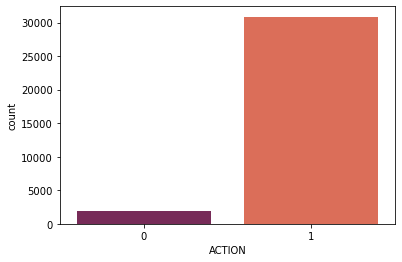

In [8]:
# Plot to show how many employees got access and how many did not

sns.countplot(x = 'ACTION', data = df, palette = 'rocket')
plt.show()

#### Separating the target variable from the dataset

In [9]:
y = df['ACTION']
y

0        1
1        1
2        1
3        1
4        1
        ..
32764    1
32765    1
32766    1
32767    1
32768    1
Name: ACTION, Length: 32769, dtype: int64

In [10]:
df = df.drop(['ACTION'], axis = 1)

In [11]:
x = df
x

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325
...,...,...,...,...,...,...,...,...,...
32764,23497,16971,117961,118300,119993,118321,240983,290919,118322
32765,25139,311198,91261,118026,122392,121143,173805,249618,121145
32766,34924,28805,117961,118327,120299,124922,152038,118612,124924
32767,80574,55643,118256,118257,117945,280788,280788,292795,119082


## Creating model for Logistic Classification

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [14]:
x_train.shape, x_test.shape

((22938, 9), (9831, 9))

In [15]:
log_reg = LogisticRegression()

In [16]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [18]:
# To find the prediction probability

log_reg.predict_proba(x_test)

array([[0.05940437, 0.94059563],
       [0.05357958, 0.94642042],
       [0.05837986, 0.94162014],
       ...,
       [0.05988483, 0.94011517],
       [0.06086882, 0.93913118],
       [0.04578481, 0.95421519]])

In [19]:
# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [20]:
# To check the confusion matrix
confusion_matrix(y_test, y_pred)

array([[   0,  558],
       [   0, 9273]], dtype=int64)

In [21]:
accuracy_score(y_test, y_pred)

0.9432407689960329

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       558
           1       0.94      1.00      0.97      9273

    accuracy                           0.94      9831
   macro avg       0.47      0.50      0.49      9831
weighted avg       0.89      0.94      0.92      9831



C:\Users\sayan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sayan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sayan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Creating model for Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
classifier = DecisionTreeClassifier()

In [25]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
classifier.score(x_train,y_train)

1.0

In [27]:
classifier.score(x_test, y_test)

0.9252364967958498

In [28]:
pred_y_train = classifier.predict(x_train)

In [29]:
pred_y_train

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [30]:
pred_y_test = classifier.predict(x_test)
pred_y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [31]:
# For parameter tuning 

from sklearn.model_selection import GridSearchCV

In [32]:
params = {
    'max_depth':[1,2,3,4,5],
    'criterion':['gini', 'entropy'],
    'min_samples_leaf':[1,2,3,4]
}

In [33]:
grid = GridSearchCV(classifier, param_grid=params, cv = 3, verbose = 2)

In [34]:
grid.fit(x_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_s

[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy,

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4]},
             verbose=2)

In [35]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1}

In [36]:
grid.best_score_

0.9421919958148051

In [37]:
# As we can check after hyper parameter tuning the score has increased

## Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier()

In [25]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [26]:
rf.score(x_train, y_train)

1.0

In [27]:
rf.score(x_test, y_test)

0.9478181263350626

## Applying Grid Search CV

In [43]:
param_grid = {
    'max_features':['auto', 'sqrt'],
    'bootstrap':[True,False],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5,10]
}

In [44]:
gs = GridSearchCV(rf, param_grid=param_grid, cv = 3, verbose = 2)

In [45]:
gs.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   2.2s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   2.0s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   2.1s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   2.1s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   2.0s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   2.0s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=10; total time=   2.0s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=10; total time=   2.0s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=10; total time=   2.0s

[CV] END bootstrap=False, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   2.9s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   2.8s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   2.8s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   3.0s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   3.0s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   3.0s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   2.9s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   3.0s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   2.9s
[CV] END bootstrap=False, max_features=sqrt, min_sam

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [46]:
gs.best_score_

0.9480338303252246

In [47]:
gs.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5}

## K- Nearest Neighbour (KNN) Classification

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier()

In [31]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
knn.score(x_train, y_train)

0.9473798936262969

In [33]:
knn.score(x_test, y_test)

0.939985759332723

In [34]:
# Tuning the parameters for KNN classifier to get a better result

neighbors = [i for i in range(2,10)]
accuracies = list()

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    accuracies.append(knn.score(x_test, y_test))

<AxesSubplot:>

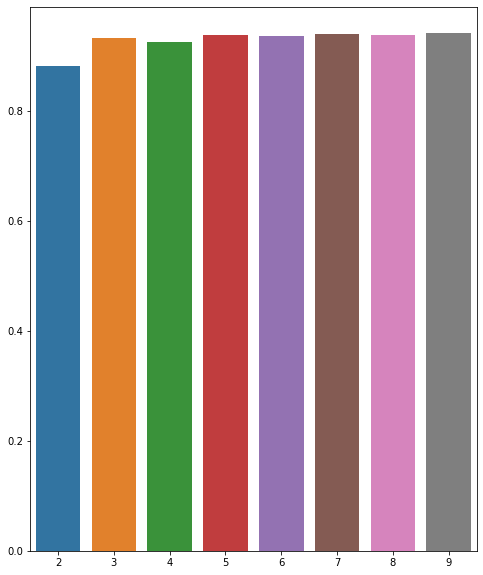

In [35]:
plt.figure(figsize=(8,10))
sns.barplot(x=neighbors, y=accuracies)

In [36]:
knn = KNeighborsClassifier(n_neighbors=9)

In [37]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [38]:
knn.score(x_train,y_train)

0.9431511029732322

In [39]:
knn.score(x_test,y_test)

0.9426304546841623

## Support Vector Machines

In [24]:
from sklearn.svm import SVC

In [29]:
clf = SVC()

In [30]:
clf.fit(x_train, y_train)

SVC()

In [31]:
clf.score(x_train, y_train)

0.9416252506757345

In [32]:
clf.score(x_test,y_test)

0.9432407689960329

In [35]:
parameters = {'C':[0.1, 1],
             'gamma':[0.0001, 0.00001]
             }

In [36]:
gs = GridSearchCV(estimator = clf, param_grid= parameters, cv = 3, verbose = 2)

In [37]:
gs.fit(x_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ................................C=0.1, gamma=0.0001; total time= 1.4min
[CV] END ................................C=0.1, gamma=0.0001; total time= 1.4min
[CV] END ................................C=0.1, gamma=0.0001; total time= 1.6min
[CV] END .................................C=0.1, gamma=1e-05; total time= 1.4min
[CV] END .................................C=0.1, gamma=1e-05; total time= 1.4min
[CV] END .................................C=0.1, gamma=1e-05; total time= 1.4min
[CV] END ..................................C=1, gamma=0.0001; total time= 1.4min
[CV] END ..................................C=1, gamma=0.0001; total time= 1.3min
[CV] END ..................................C=1, gamma=0.0001; total time= 2.0min
[CV] END ...................................C=1, gamma=1e-05; total time= 2.0min
[CV] END ...................................C=1, gamma=1e-05; total time= 1.8min
[CV] END ...................................C=1, 

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [0.0001, 1e-05]}, verbose=2)

In [38]:
gs.best_params_

{'C': 1, 'gamma': 0.0001}

In [39]:
gs.best_score_

0.9430203156334467

In [40]:
clf = SVC(kernel = 'rbf', C = 1, gamma = 0.0001)

In [ ]:
clf.fit(x_train, y_train)

# Applying adaptive boosting technique

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
from sklearn import metrics as mt
from sklearn.model_selection import KFold, cross_val_score

In [40]:
AB = AdaBoostClassifier()
AB.fit(x_train, y_train)

AdaBoostClassifier()

In [41]:
# Checking scores for training data
AB_pred = AB.predict(x_train)

In [42]:
# Classification report for training data
print(mt.classification_report(y_train, AB_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1339
           1       0.94      1.00      0.97     21599

    accuracy                           0.94     22938
   macro avg       0.97      0.50      0.49     22938
weighted avg       0.95      0.94      0.91     22938



In [43]:
# Accuracy
AB_accuracy = mt.accuracy_score(y_train, AB_pred)
AB_accuracy

0.9416688464556631

In [44]:
# Precison score 
AB_precision =  mt.precision_score(y_train, AB_pred)
AB_precision

0.9416663033526617

In [45]:
# F1-Score
AB_f1 = mt.f1_score(y_train,AB_pred)
AB_f1

0.9699568888090533

In [46]:
# Recall
AB_rscore = mt.recall_score(y_train,AB_pred)
AB_rscore

1.0

In [47]:
# checking score for test data
AB_pred_test = AB.predict(x_test)

In [48]:
AB_acc_test = mt.accuracy_score(y_test, AB_pred_test)
AB_acc_test

0.9432407689960329

In [49]:
print(mt.classification_report(y_test, AB_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       558
           1       0.94      1.00      0.97      9273

    accuracy                           0.94      9831
   macro avg       0.47      0.50      0.49      9831
weighted avg       0.89      0.94      0.92      9831



C:\Users\sayan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sayan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sayan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Gradient Boosting technique

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
GB = GradientBoostingClassifier()

In [52]:
GB.fit(x_train, y_train)

GradientBoostingClassifier()

In [53]:
GB_pred = GB.predict(x_train)

In [54]:
GB_accuracy = mt.accuracy_score(y_train, GB_pred)
GB_accuracy

0.9428459325137327

In [57]:
# Checking score for test data

In [58]:
GB_pred_test = GB.predict(x_test) 

In [59]:
GB_acc_test = mt.accuracy_score(y_test,GB_pred_test)
GB_acc_test

0.9440545214118604

In [60]:
print(mt.classification_report(y_test, GB_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.02      0.04       558
           1       0.94      1.00      0.97      9273

    accuracy                           0.94      9831
   macro avg       0.85      0.51      0.51      9831
weighted avg       0.93      0.94      0.92      9831



## Bagging Classifier

In [61]:
from sklearn.ensemble import BaggingClassifier

In [63]:
BC = BaggingClassifier()
BC.fit(x_train, y_train)

BaggingClassifier()

In [64]:
BC_pred = BC.predict(x_train)

In [65]:
# Checking accuracy for train data
BC_acc = mt.accuracy_score(y_train, BC_pred)
BC_acc

0.9960327840265062

In [67]:
# Classification report Bagging Classifier
print(mt.classification_report(y_train, BC_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1339
           1       1.00      1.00      1.00     21599

    accuracy                           1.00     22938
   macro avg       0.99      0.98      0.98     22938
weighted avg       1.00      1.00      1.00     22938



In [69]:
# Checking accuracy for test data
Bc_pred_test = BC.predict(x_test)

In [72]:
# Checking accuray for test data
Bcc_acc_test = mt.accuracy_score(y_test, Bc_pred_test)
Bcc_acc_test

0.9447665547757095

In [74]:
print(mt.classification_report(y_test, Bc_pred_test))

              precision    recall  f1-score   support

           0       0.52      0.39      0.44       558
           1       0.96      0.98      0.97      9273

    accuracy                           0.94      9831
   macro avg       0.74      0.68      0.71      9831
weighted avg       0.94      0.94      0.94      9831

